In [1]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('../images/presentation.mplstyle')


In [2]:
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0031.csv")

In [3]:
geo_vacc_per_age = geo_vacc_per_age.replace(to_replace={'<15': 4})

In [4]:
geo_vacc_per_age['Date'] = pd.to_datetime(geo_vacc_per_age['Date'],format='%Y-%m-%d')
geo_vacc_per_age = geo_vacc_per_age.rename(columns={'Date':'date'})

In [5]:
geo_vacc_per_age.columns

Index(['CityName', 'CityCode', 'date', 'first_dose_0-19', 'first_dose_20-29',
       'first_dose_30-39', 'first_dose_40-49', 'first_dose_50-59',
       'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89',
       'first_dose_90+', 'second_dose_0-19', 'second_dose_20-29',
       'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
       'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89',
       'second_dose_90+'],
      dtype='object')

In [6]:
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
geo_vacc_per_age[float_columns] = geo_vacc_per_age[float_columns].astype(float)

In [7]:
agg_dict = {k:'sum' for k in float_columns}
geo_vacc_per_age = geo_vacc_per_age.groupby('date', as_index=False).agg(agg_dict)

In [8]:
geo_vacc_per_age

,date,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,2020-12-20,48.0,511.0,1179.0,1683.0,1716.0,1520.0,547.0,111.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-12-21,140.0,1342.0,3491.0,5002.0,5083.0,7905.0,5199.0,1295.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-22,240.0,2500.0,6576.0,8795.0,9023.0,20030.0,16324.0,4606.0,664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-23,349.0,4177.0,9883.0,12985.0,13700.0,38236.0,33177.0,9969.0,1649.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-24,513.0,5898.0,12958.0,17297.0,18450.0,59930.0,53173.0,16837.0,2890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-04-02,291058.0,857224.0,810236.0,782164.0,659404.0,603283.0,442161.0,198926.0,46156.0,247817.0,747794.0,732118.0,722673.0,615315.0,573281.0,426120.0,190873.0,43437.0
104,2021-04-03,291242.0,857692.0,810468.0,782322.0,659516.0,603330.0,442186.0,198931.0,46158.0,248171.0,748848.0,732686.0,723083.0,615530.0,573385.0,426167.0,190890.0,43438.0
105,2021-04-04,292342.0,860260.0,812333.0,783493.0,660304.0,603836.0,442492.0,199088.0,46210.0,250750.0,755360.0,737489.0,726092.0,617173.0,574335.0,426654.0,191186.0,43502.0
106,2021-04-05,293557.0,862904.0,814114.0,784589.0,661067.0,604316.0,442812.0,199288.0,46267.0,253323.0,761480.0,741423.0,728459.0,618606.0,575139.0,427074.0,191421.0,43569.0


In [9]:
columns_real=geo_vacc_per_age.columns
matrix_values=geo_vacc_per_age.values
matrix_values[1:,1:]-=matrix_values[:-1,1:]
agg_vacc_data = pd.DataFrame(matrix_values, columns =columns_real)
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
agg_vacc_data[float_columns] = agg_vacc_data[float_columns].astype(float)
agg_vacc_data

,date,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,2020-12-20,48.0,511.0,1179.0,1683.0,1716.0,1520.0,547.0,111.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-12-21,92.0,831.0,2312.0,3319.0,3367.0,6385.0,4652.0,1184.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-22,100.0,1158.0,3085.0,3793.0,3940.0,12125.0,11125.0,3311.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-23,109.0,1677.0,3307.0,4190.0,4677.0,18206.0,16853.0,5363.0,985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-24,164.0,1721.0,3075.0,4312.0,4750.0,21694.0,19996.0,6868.0,1241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-04-02,290.0,756.0,585.0,381.0,275.0,120.0,54.0,27.0,6.0,757.0,2345.0,1879.0,1120.0,594.0,306.0,119.0,76.0,13.0
104,2021-04-03,184.0,468.0,232.0,158.0,112.0,47.0,25.0,5.0,2.0,354.0,1054.0,568.0,410.0,215.0,104.0,47.0,17.0,1.0
105,2021-04-04,1100.0,2568.0,1865.0,1171.0,788.0,506.0,306.0,157.0,52.0,2579.0,6512.0,4803.0,3009.0,1643.0,950.0,487.0,296.0,64.0
106,2021-04-05,1215.0,2644.0,1781.0,1096.0,763.0,480.0,320.0,200.0,57.0,2573.0,6120.0,3934.0,2367.0,1433.0,804.0,420.0,235.0,67.0


In [10]:
infect_dec=np.zeros((108))
infect_dec[:14]=1
infect_dec[14:21]=0.43
infect_dec[21:27]=0.34
infect_dec[27:]=0.06
infect_dec = 1 - infect_dec
columns=['date', '10-19',  '20-29',  '30-39', '40-49',  '50-59',  '60-69',  '70-79', '80-89', '99-100']
matrix_values=copy.deepcopy(agg_vacc_data.values[:,:10])
matrix_values_2=copy.deepcopy(agg_vacc_data.values[:,:10])
for i in range(matrix_values.shape[0]):
    matrix_values_2[i,1:]=np.dot(np.expand_dims(infect_dec[:i+1][::-1],axis=0),matrix_values[:i+1,1:])
all_vacc_data = pd.DataFrame(matrix_values_2, columns =columns)
float_columns = ['10-19',  '20-29',  '30-39', '40-49',  '50-59',  '60-69',  '70-79', '80-89', '99-100']
all_vacc_data[float_columns] = all_vacc_data[float_columns].astype(int)
all_vacc_data['80+'] = all_vacc_data.iloc[:, -2:].sum(axis=1)
all_vacc_data = all_vacc_data.drop(columns=['80-89', '99-100'])

In [11]:
all_vacc_data

,date,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,2020-12-20,0,0,0,0,0,0,0,0
1,2020-12-21,0,0,0,0,0,0,0,0
2,2020-12-22,0,0,0,0,0,0,0,0
3,2020-12-23,0,0,0,0,0,0,0,0
4,2020-12-24,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
103,2021-04-02,254433,758384,728660,713457,605571,558195,410942,227236
104,2021-04-03,255814,761925,731052,715162,606708,558892,411305,227453
105,2021-04-04,257684,766690,734394,717302,608179,559824,411807,227751
106,2021-04-05,259508,771300,737650,719420,609589,560730,412294,228052


In [12]:
total_population = 9*10**6
all_vacc_data[all_vacc_data['date']==pd.to_datetime('2021-04-06',format='%Y-%m-%d')].sum(axis=1)/total_population

107    0.478564
dtype: float64

In [13]:
all_vacc_data.to_csv("vaccination_data_for_simulation.csv")

In [14]:
all_vacc_data['day'] = (all_vacc_data['date'] - pd.to_datetime('2020-06-01',format='%Y-%m-%d')).dt.days

In [15]:
num_per_age = all_vacc_data[all_vacc_data['day'] == 220].values[0, 1:-1]
ages = all_vacc_data[all_vacc_data['day'] == 220].columns[ 1:-1]

In [16]:
{k: v for (k, v) in zip(ages, num_per_age)}

{'10-19': 292,
 '20-29': 3361,
 '30-39': 7386,
 '40-49': 9859,
 '50-59': 10516,
 '60-69': 34160,
 '70-79': 30308,
 '80+': 11244}

In [17]:
data = all_vacc_data.to_numpy()[:,1:]

In [18]:
all_new_vacc_data = all_vacc_data.copy()
all_new_vacc_data.iloc[:, 1:-1] 

,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
103,254433,758384,728660,713457,605571,558195,410942,227236
104,255814,761925,731052,715162,606708,558892,411305,227453
105,257684,766690,734394,717302,608179,559824,411807,227751
106,259508,771300,737650,719420,609589,560730,412294,228052


In [19]:
all_new_vacc_data = all_vacc_data.copy()
all_new_vacc_data.iloc[1:, 1:-1] = all_new_vacc_data.iloc[1:, 1:-1].values - all_new_vacc_data.iloc[:-1, 1:-1].values
all_new_vacc_data['num_tot'] = all_new_vacc_data.iloc()[:,1:-1].sum(axis=1)

In [20]:
for a in ages: 
    all_new_vacc_data[f"per_{a}"] = all_new_vacc_data[a] / (all_new_vacc_data['num_tot'] + 1e-5)

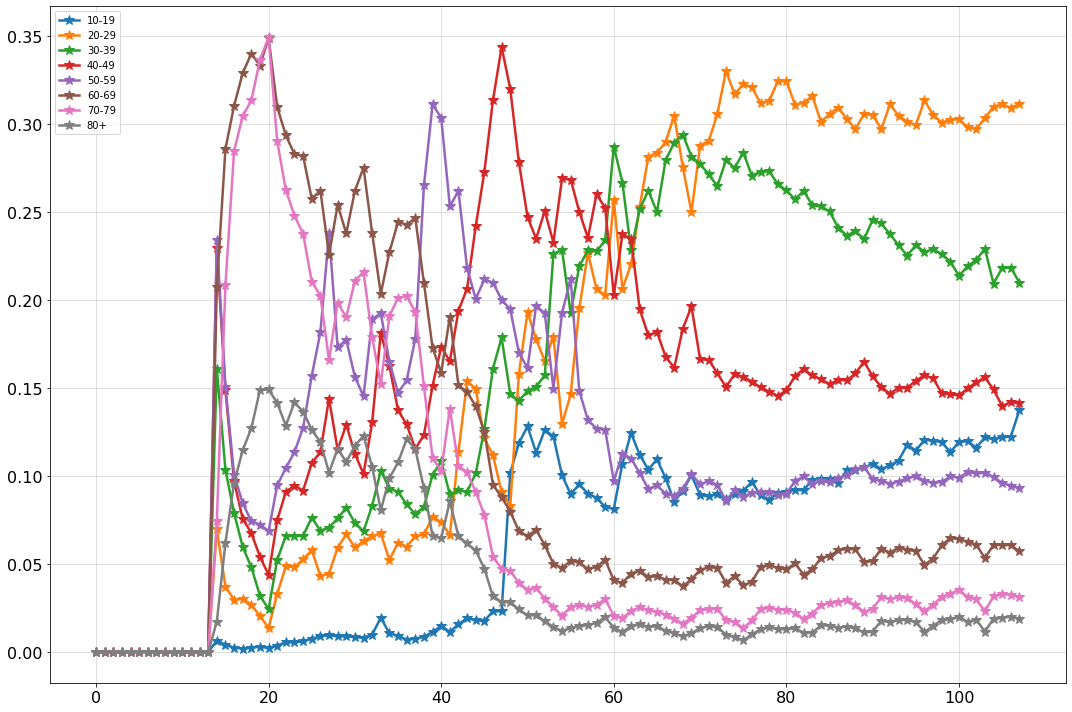

In [21]:
for a in ages: 
    plt.plot(range(all_new_vacc_data[f'per_{a}'].size), all_new_vacc_data[f'per_{a}'], marker='*', label=a)
plt.legend()
plt.grid()

In [22]:
all_new_vacc_data_out = all_new_vacc_data.iloc()[:, :11].drop(columns="day")

In [23]:
all_new_vacc_data_out.to_csv("all_new_vaccination_data.csv")

In [24]:
# plt.plot(range(all_new_vacc_data.num_tot.size), 10000*all_new_vacc_data.num_tot/(9*10**6))